<a href="https://colab.research.google.com/github/Jhoe73/data_science/blob/main/distribuicoes_de_probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuições de probabilidades

* **Distribuição Binomial**
Em teoria das probabilidades e estatística, a distribuição binomial é a distribuição de probabilidade discreta do número de sucessos numa sequência de
${\displaystyle n}$ tentativas tais que:

    1. Cada tentativa tem exclusivamente como resultado duas possibilidades, sucesso ou fracasso (binomial, a que se chama de ensaio de Bernoulli), e;

    2. Cada tentativa é independente das demais, e;

    3. A probabilidade de sucesso ${\displaystyle p}$ a cada tentativa permanece constante independente das demais, e;

    4. A variável de interesse, ou pretendida, é o número de sucessos ${\displaystyle k}$ nas ${\displaystyle n}$ tentativas.

(array([  1.,   7.,  47., 136., 203., 224., 202., 124.,  42.,  14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

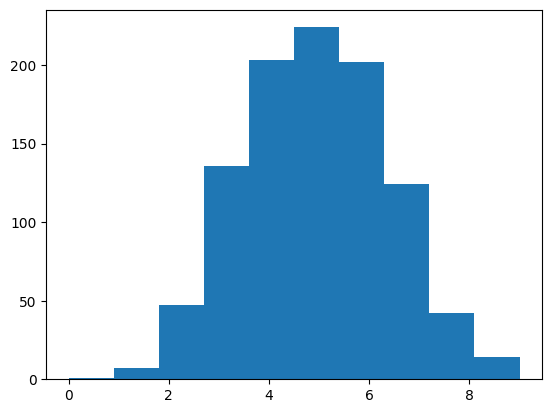

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n, p = 10, .5  # nº de repetições do experimento (Bernoulli), probabilidade de sucesso
s = np.random.binomial(n, p, 1000) # geram-se 1000 valores dessa Binomial(n,p); s contém os 1000 valores da Binomial(n,p)
plt.hist(s)

(array([  1.,   5.,  37., 122., 201., 254., 200., 123.,  39.,  18.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

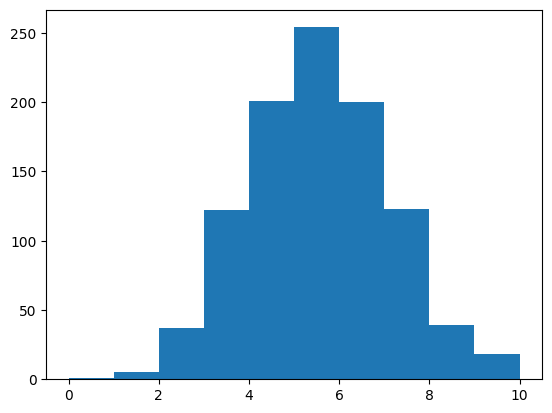

In [ ]:
# importa as bibliotecas
from scipy.stats import binom

# Usando o scipy.stats
n, p = 10, .5  # nº de repetições do experimento (Bernoulli), probabilidade de sucesso]

# Gerar variáveis aleatórias (amostras) de uma distribuição binomial. (Desta vez utilizando a função rvs do import binom)
s = binom.rvs(n, p, size=1000) # cada elemento de s é Binomial(n,p)
plt.hist(s)

<BarContainer object of 11 artists>

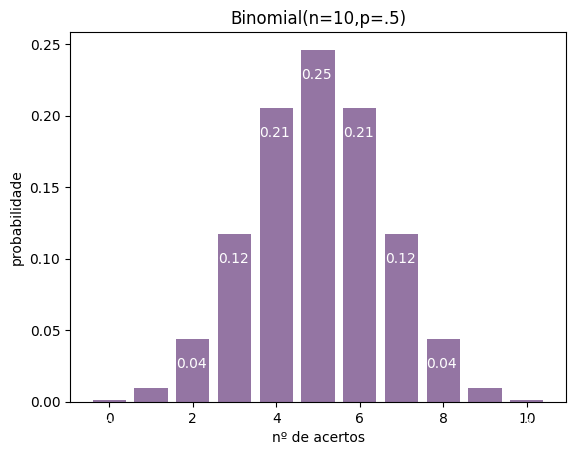

In [ ]:
x = range(0,n+1) # valores de x =0,1,2,3, ..., n
p_x = binom.pmf(x,n,p) # distribuição de probabilidade teórica dos resultados

# Aqui fazemos o gráfico da função massa de probabilidade de X
# Note que trata-se de um gráfico de barras pois X é uma variável discreta
import matplotlib.pyplot as plt

plt.xlabel('nº de acertos')
plt.ylabel('probabilidade')

for a,b in zip(x, p_x):
    plt.text(a-0.4, b-0.02, str(round(b,2)), color='white')

plt.title('Binomial(n=10,p=.5)')
plt.bar(x,p_x,color = (0.3,0.1,0.4,0.6))

In [ ]:
binom.pmf(3,n,p) # função (massa) de probabilidade da Binomial (n,p)

0.11718749999999999

In [ ]:
binom.cdf(3,n,p) # função de distribuição acumulada da Binomial (n,p)

0.171875

In [ ]:
binom.mean(n,p) # valor esperado da Binomial (n,p)

5.0

In [ ]:
binom.var(n,p) # variância da Binomial (n,p)

2.5

* **Distribuição de Poisson**
A distribuição de Poisson descreve resultados de experiências nos quais contamos acontecimentos que ocorrem aleatoriamente mas a uma taxa média definida. Por exemplo: as contagens de um decaimento radioactivo ou o nº de bebés que nasce por mês num determinado hospital.

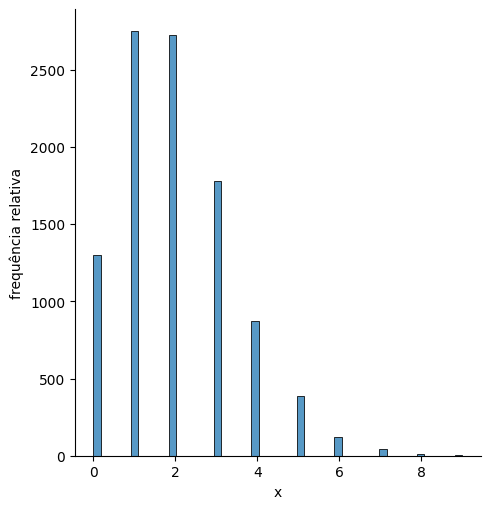

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

# Gera uma amostra de valores da Poisson
sample = poisson.rvs(mu=2, size=10000, random_state=13) #"rvs" significa "random variates"

# Faz o gráfico de barras da amostra de valores
sns.displot(sample, kde=False)
plt.xlabel('x')
plt.ylabel('frequência relativa')
plt.show()

<BarContainer object of 101 artists>

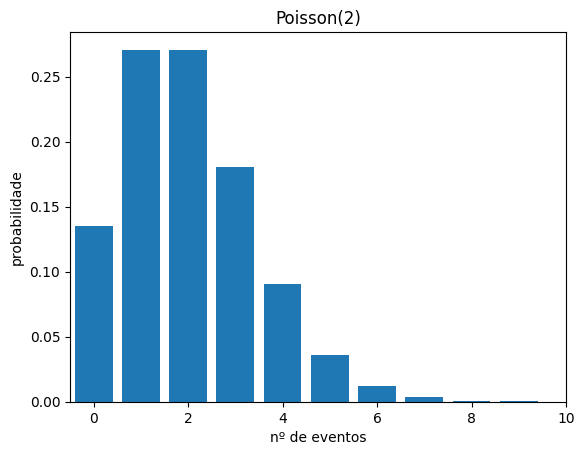

In [ ]:
n = 100
x = range(0,n+1) # valores de x =0,1,2,3, ...
p_x = poisson.pmf(x, mu=2) # distribuição de probabilidade dos resultados para Poisson de média 2

# Aqui fazemos o gráfico da função massa de probabilidade de X
# Note que trata-se de um gráfico de barras pois X é uma variável discreta
import matplotlib.pyplot as plt
plt.xlabel('nº de eventos')
plt.ylabel('probabilidade')
plt.xlim(xmax=10,xmin=-.5)
plt.title('Poisson(2)')
plt.bar(x,p_x)

Aproximação da Binomial pela Poisson

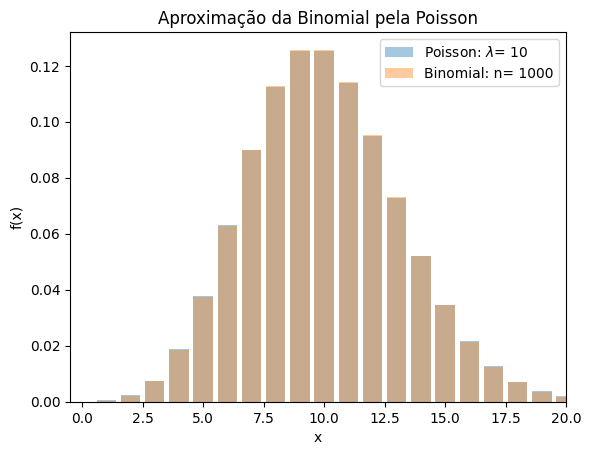

In [ ]:
n = 1000
p = .01
mu = n*p
x = range(0,n+1) # valores de x =0,1,2,3, ...
pa_x = poisson.pmf(x,mu) # distribuição dos resultados para Poisson
p_x = binom.pmf(x,n,p) # distribuição dos resultados para Binomial

# Aqui fazemos o gráfico da função massa de probabilidade de X
# Note que trata-se de um gráfico de barras pois X é uma variável discreta
import matplotlib.pyplot as plt

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(xmax=20,xmin=-.5)
plt.title('Aproximação da Binomial pela Poisson')
plt.bar(x,pa_x,  alpha=0.4, label=r'Poisson: $\lambda$= %d' % mu)
plt.bar(x,p_x, alpha=0.4, label='Binomial: n= %d' % n)
plt.legend()

In [ ]:
binom.pmf(0,n=10000,p=.000001) # 0 erros dos 10^4 bit transmitidos usando a Binomial

0.9900498287989149

In [ ]:
poisson.pmf(0,mu=.01)# 0 erros dos 10^4 bit transmitidos usando a Poisson

0.9900498337491681

* **Distribuição Normal**
     também conhecida como distribuição gaussiana, é uma das distribuições de probabilidade mais importantes e amplamente utilizadas em estatística. Ela descreve como as observações de uma variável aleatória contínua se distribuem de forma que a maioria das observações se agrupa em torno de uma média central, com a distribuição dos valores decrescendo simetricamente para os dois lados dessa média. A forma da distribuição normal é a famosa "curva de sino".

    Para uma distribuição perfeitamente normal, a média, mediana e moda terão o mesmo valor, visualmente representados pelo pico da curva. Também é frequentemente chamada de curva de sino porque o gráfico de sua densidade de probabilidade se parece com um sino.

(array([ 12.,  30.,  99., 200., 249., 215., 130.,  50.,  12.,   3.]),
 array([ 3.81035945,  5.13130943,  6.45225941,  7.77320938,  9.09415936,
        10.41510934, 11.73605931, 13.05700929, 14.37795927, 15.69890924,
        17.01985922]),
 <BarContainer object of 10 artists>)

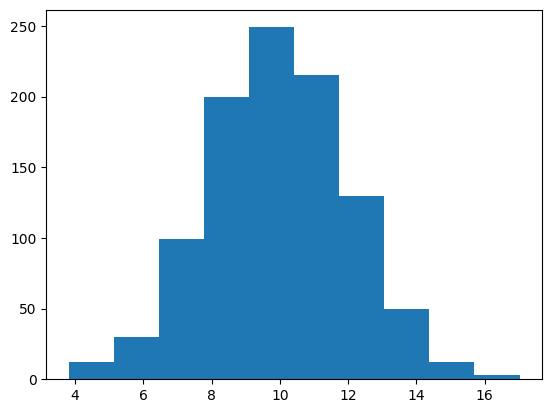

In [ ]:
# importa as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

mu, sigma2 = 10, 2
s = np.random.normal(mu, sigma2, 1000) # geram-se 1000 valores da Normal(mu,sigma2)
plt.hist(s)

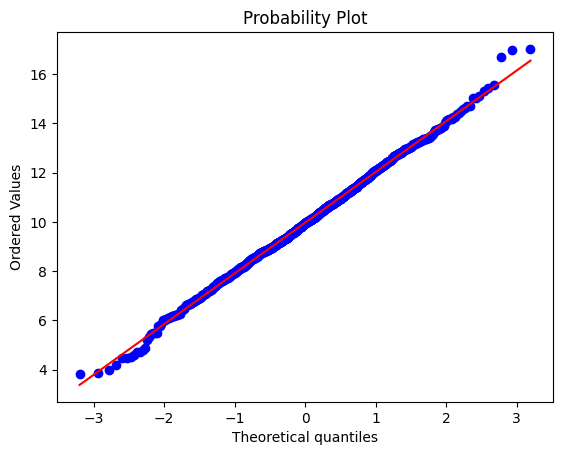

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy import stats

# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(s, plot=plt)
fig = plt.figure()

Vários cálculos com a distribuição Normal

In [ ]:
from scipy.stats import norm

# Qual o valor de Z ~ N(0,1) que deixa 2,5% dos dados à esquerda : F(z)=0,025
z= norm.ppf(0.025)
print(z)


-1.9599639845400545


In [ ]:
# Qual a "altura" da curva da função densidade de Z ~ N(0,1) no ponto dado
norm.pdf(-1.9599639845400545)

0.058445069805035325

In [ ]:
# Qual o valor de X ~ N(10,2^2) que deixa 2,5% dos dados à esquerda : F(x)=0,025
norm.ppf(0.025,loc=10, scale=2)

6.080072030919891

In [ ]:
# Repare que esse valor é: 2 * z + 10
2 * -1.9599639845400545 +10

6.080072030919891

In [ ]:
# Qual a probabilidade de X estar entre a média +/- 1 desvio padrão:

# Quando X ~ N(0,1)
norm.cdf(1)-norm.cdf(-1)

0.6826894921370859

In [ ]:
# Quando X ~ N(10,2^2)
norm.cdf(12,loc=10, scale=2)-norm.cdf(8,loc=10, scale=2)

0.6826894921370859

(array([560., 239., 114.,  48.,  21.,   7.,   5.,   1.,   3.,   2.]),
 array([5.14629903e-04, 3.02705698e+00, 6.05359933e+00, 9.08014169e+00,
        1.21066840e+01, 1.51332264e+01, 1.81597687e+01, 2.11863111e+01,
        2.42128534e+01, 2.72393958e+01, 3.02659382e+01]),
 <BarContainer object of 10 artists>)

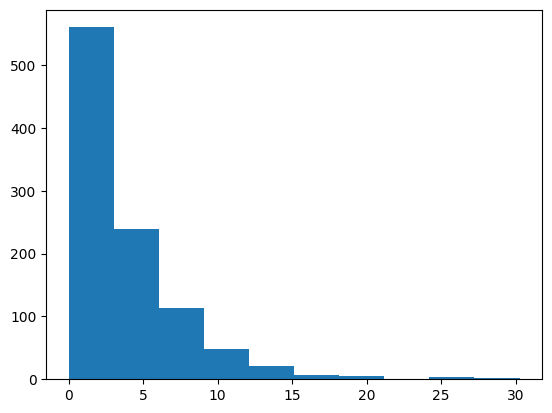

In [ ]:
# importa as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

l = 4
s = np.random.exponential(l, 1000) # geram-se 1000 valores da Exponencial de média l
plt.hist(s)

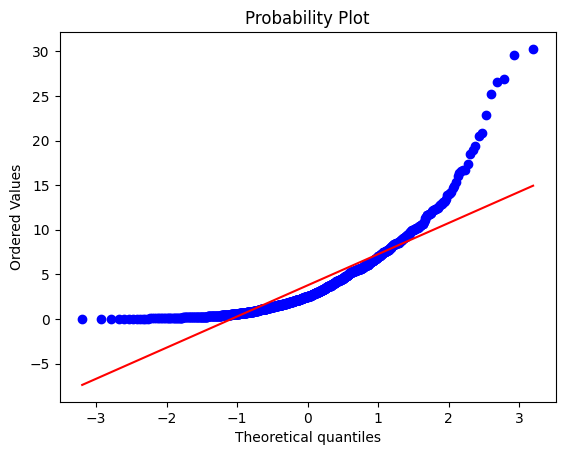

<Figure size 640x480 with 0 Axes>

In [ ]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(s, plot=plt)
fig = plt.figure()

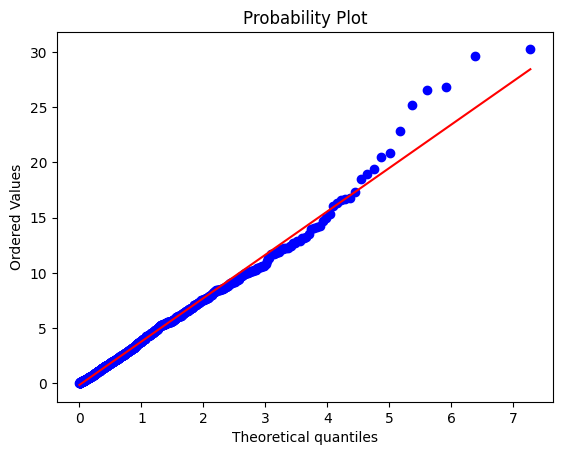

<Figure size 640x480 with 0 Axes>

In [ ]:
# Gráfico de probabilidade da Exponencial, para checar suposição de tal distribuição dos dados
stats.probplot(s, dist=stats.expon, plot=plt)
fig = plt.figure()

* **Distribuição uniforme** é a distribuição de probabilidades contínua mais simples de conceituar:

    A probabilidade de se gerar qualquer ponto em um intervalo contido no espaço amostral é proporcional ao tamanho do intervalo, visto que na distribuição uniforme a f(x) é igual para qualquer valor de x no intervalo considerado.

    Outra maneira de se dizer "distribuição uniforme" seria "um número finito de resultados com chances iguais de acontecer".

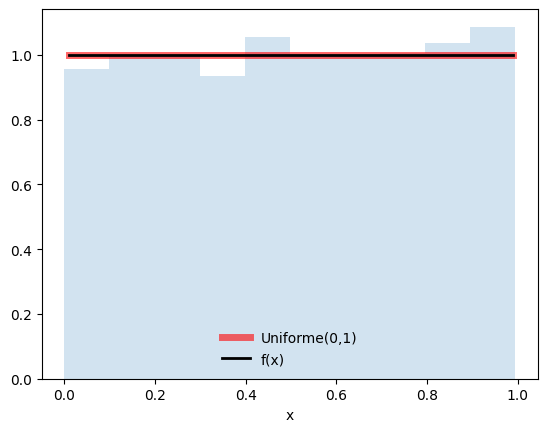

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Gera linha fixa preta com borda vermelha
fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='Uniforme(0,1)')
rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='f(x)')

# Gera distribuição uniforme
r = uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlabel("x")

plt.show()